<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets.imdb import load_data
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping

In [53]:
(xtrain, ytrain), (xtest, ytest) = load_data(num_words=10000)  # keep only the top 10,000 most frequent occuring words, rare words will be discarded.
                                                               # xtrain and xtest are lists of reviews encoded as a list of word indices (0 to 9,999)
                                                               # reviews as sequences of words turned into sequences of integers, each integer stands for a specific word in a dictionary
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(len(ytrain))
#print(xtrain[0])
#print(xtrain[1])

print(len(xtrain[0]), len(xtrain[1]))
print(ytrain[0])

(25000,)
(25000,)
(25000,)
25000
218 189
1


In [54]:
# lists or reviews are not of the same length, so pad your lists to have the same length (samples, word_indices)

def vectorize(sequences, num_words=10000):
  results = np.zeros((len(sequences), num_words))    # a 10,000 dimensional vector of zeros except for word indices
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize(xtrain)
x_test = vectorize(xtest)

print(x_train.shape)

y_train = np.asarray(ytrain).astype('float32')
y_test = np.asarray(ytest).astype('float32')

(25000, 10000)


In [61]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.8))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

model.summary()
plot_model(model, to_file='IMDB.png', show_shapes=True, show_layer_names=True)

x_train_ = x_train[:20000]
y_train_ = y_train[:20000]
x_val = x_train[20000:]
y_val = y_train[20000:]

# fit model
history = model.fit(x_train_, y_train_, epochs=25, batch_size=512, validation_data=(x_val, y_val), shuffle=True, verbose=1, callbacks=[es])
res = model.evaluate(x_test, y_test)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 129       
Total params: 5,186,305
Trainable params: 5,186,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
40/40 [==============================] - 10s 240ms/step - loss: 0.5125 - accuracy: 0.7520 - val_loss: 0.3007 - val_accuracy: 0.8832
Epoch 2/25
40/40 [==============================] - 9s 233ms/step - loss: 0.3033 - accuracy: 0.8778

In [62]:
# predict for sentiment
y_pred = np.round(model.predict(x_test))
#print(y_pred)
print('prediction error:', np.sum(y_pred != y_test)/len(y_pred)*100)

prediction error: 1250000.0


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


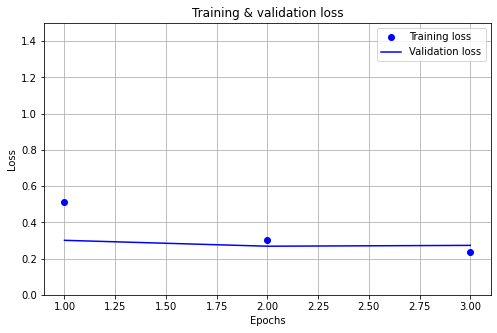

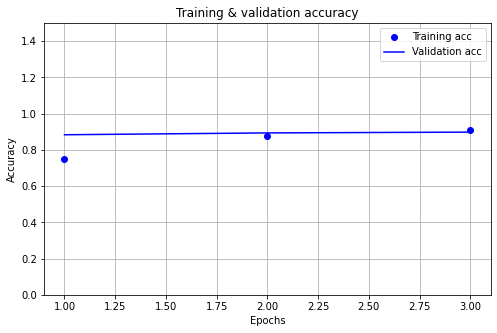

In [63]:
history_dict = history.history
print(history_dict.keys())

train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(train_loss)+1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training & validation loss')
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training & validation accuracy')
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

